In [1]:
# Dependencies 
import pandas as pd
import requests
import string
import matplotlib.pyplot as plt

In [2]:
fatal_crash_file = 'csv_files/fatal_accidents_2019.csv'
county_info = 'csv_files/cleaned_county_vs_crash_count'
crashes_df = pd.read_csv(fatal_crash_file, low_memory=False)
pd.set_option('display.max_columns', 94)
crashes_df = crashes_df.set_index('STATENAME', append=True)

In [7]:
crashes_df.dtypes()

TypeError: 'numpy.dtype' object is not callable

In [9]:
drunk_df = crashes_df[crashes_df['DRUNK_DR']==1]

In [10]:
drunk_df

,,Unnamed: 0,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,CF1,CF1NAME,CF2,CF2NAME,CF3,CF3NAME,CITY,CITYNAME,COUNTY,COUNTYNAME,CaseYear,DAY,DAY_WEEK,DAY_WEEKNAME,DRUNK_DR,FATALS,FUNC_SYS,FUNC_SYSNAME,HARM_EV,HARM_EVNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,HOUR,HOURNAME,LATITUDE,LATITUDENAME,LGT_COND,LGT_CONDNAME,LONGITUD,LONGITUDNAME,MAN_COLL,MAN_COLLNAME,MILEPT,MILEPTNAME,MINUTE,MINUTENAME,MONTH,MonthName,NHS,NHSNAME,NOT_HOUR,NOT_HOURNAME,NOT_MIN,NOT_MINNAME,PEDS,PERMVIT,PERNOTMVIT,PERSONS,PVH_INVL,RAIL,RAILNAME,RD_OWNER,RD_OWNERNAME,RELJCT1,RELJCT1NAME,RELJCT2,RELJCT2NAME,REL_ROAD,REL_ROADNAME,ROAD_FNC,ROAD_FNCNAME,ROUTE,ROUTENAME,RUR_URB,RUR_URBNAME,SCH_BUS,SCH_BUSNAME,SP_JUR,SP_JURNAME,ST_CASE,State,TWAY_ID,TWAY_ID2,TYP_INT,TYP_INTNAME,VE_FORMS,VE_TOTAL,WEATHER,WEATHER1,WEATHER1NAME,WEATHER2,WEATHER2NAME,WEATHERNAME,WRK_ZONE,WRK_ZONENAME,YEAR
,STATENAME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Alabama,0,13,1:00pm-1:59pm,9,9,0,None,0,None,0,None,2340,OPELIKA,81,LEE (81),2019,7,5,Thursday,1,1,1,Interstate,12,Motor Vehicle In-Transport,13,1:00pm-1:59pm,27,27,12,12:00pm-12:59pm,32.666222,32.666222,1,Daylight,-85.336658,-85.336658,1,Front-to-Rear,641,641,54,54,2,February,1,This section IS ON the NHS,12,12:00pm-12:59pm,59,59,0,3,0,3,0,0000000,Not Applicable,1,State Highway Agency,0,No,1,Non-Junction,1,On Roadway,NaN,NaN,1,Interstate,2,Urban,0,No,0,No Special Jurisdiction,10001,1,I-85,NaN,1,Not an Intersection,2,2,1,1,Clear,0,No Additional Atmospheric Conditions,Clear,0,None,2019
4,Alabama,4,6,6:00am-6:59am,0,0,0,None,0,None,0,None,0,NOT APPLICABLE,3,BALDWIN (3),2019,18,6,Friday,1,1,1,Interstate,1,Rollover/Overturn,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),5,5:00am-5:59am,30.656269,30.656269,2,Dark - Not Lighted,-87.809461,-87.809461,0,The First Harmful Event was Not a Collision wi...,413,413,50,50,1,January,1,This section IS ON the NHS,99,Unknown,99,Unknown,0,1,0,1,0,0000000,Not Applicable,1,State Highway Agency,0,No,1,Non-Junction,4,On Roadside,NaN,NaN,1,Interstate,2,Urban,0,No,0,No Special Jurisdiction,10005,1,I-10,NaN,1,Not an Intersection,1,1,5,5,"Fog, Smog, Smoke",0,No Additional Atmospheric Conditions,"Fog, Smog, Smoke",0,None,2019
7,Alabama,7,88,Not Applicable,88,Not Applicable,0,None,0,None,0,None,790,COTTONWOOD,69,HOUSTON (69),2019,9,7,Saturday,1,1,7,Local,1,Rollover/Overturn,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),21,9:00pm-9:59pm,31.068686,31.068686,2,Dark - Not Lighted,-85.333658,-85.333658,0,The First Harmful Event was Not a Collision wi...,0,None,2,2,2,February,0,This section IS NOT on the NHS,88,Not Applicable (Not Notified),88,Not Applicable (Not Notified),0,1,0,1,0,0000000,Not Applicable,2,County Highway Agency,0,No,1,Non-Junction,1,On Roadway,NaN,NaN,4,County Road,1,Rural,0,No,0,No Special Jurisdiction,10008,1,CR-FLETCHER SMITH RD,NaN,1,Not an Intersection,1,1,1,1,Clear,0,No Additional Atmospheric Conditions,Clear,0,None,2019
10,Alabama,10,2,2:00am-2:59am,23,23,0,None,0,None,0,None,0,NOT APPLICABLE,123,TALLAPOOSA (123),2019,1,3,Tuesday,1,1,4,Minor Arterial,42,Tree (Standing Only),99,Unknown,99,Unknown EMS Hospital Arrival Time,1,1:00am-1:59am,33.104300,33.104300,2,Dark - Not Lighted,-85.773344,-85.773344,0,The First Harmful Event was Not a Collision wi...,528,528,45,45,1,January,0,This section IS NOT on the NHS,99,Unknown,99,Unknown,0,3,0,3,0,0000000,Not Applicable,1,State Highway Agency,0,No,1,Non-Junction,4,On Roadside,NaN,NaN,3,State Highway,1,Rural,0,No,0,No Special Jurisdiction,10011,1,SR-49,NaN,1,Not an Intersection,1,1,2,2,Rain,0,No Additional Atmospheric Conditions,Rain,0,None,2019
27,Alabama,27,16,4:00pm-4:59pm,18,18,0,None,0,None,0,None,3050,TUSCALOOSA,125,TUSCALOOSA (125),2019,12,7,Saturday,1,2,3,Principal Arterial - Other,12,Motor Vehicle In-Transport,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),16,4:00pm-4:59pm,33.170528,33.170528,1,Daylight,-87.486125,-87.4

In [14]:
state_count = drunk_df.groupby('STATENAME').count()

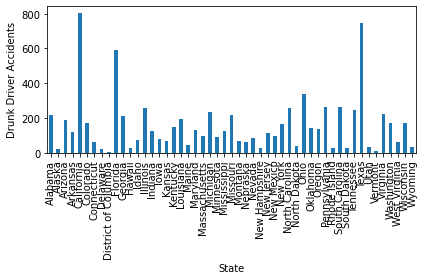

In [18]:
state_countplt = state_count['CITY']
state_countplt.plot(kind='bar')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('Drunk Driver Accidents')
plt.tight_layout()
plt.show()

In [107]:
rur_urb = drunk_df.groupby(['STATENAME', 'RUR_URBNAME']).count().unstack('RUR_URBNAME')
rurb_count = rur_urb['Unnamed: 0']

In [112]:
rurb_clean = rurb_count.drop(['Not Reported','Trafficway Not in State Inventory','Unknown'], axis=1)
rurb_clean

RUR_URBNAME,Rural,Urban
STATENAME,,
Alabama,125.0,95.0
Alaska,11.0,9.0
Arizona,65.0,110.0
Arkansas,88.0,32.0
California,293.0,505.0
Colorado,69.0,103.0
Connecticut,17.0,46.0
Delaware,15.0,9.0
District of Columbia,NaN,3.0


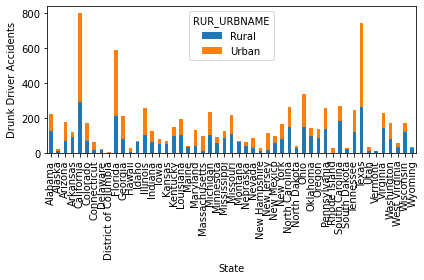

In [113]:
rurb_clean.plot(kind='bar', stacked=True)
plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('Drunk Driver Accidents')
plt.tight_layout()
plt.show()